<a href="https://colab.research.google.com/github/Nerobite/libraries_for_DA/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

You need to write a function that is based on a search on [habr.com](https://habr.com/ru/search/). The function should take as a parameter a list of search queries (e.g. ['python', 'data analysis']) and return a dataframe of the form:

date - title - material link


*   In addition to the list of keywords to search for, it is necessary to declare a parameter with the number of pages of search results. I.e. when passing argument 4 to the function it is necessary to get materials from the first 4 pages of results;

*   the dataframe should contain columns with the full text of found materials and the number of likes:

date - title - material link - text of material - number of likes


Material in the dataframe should not be duplicated if it appeared in the search results for multiple queries in the list.





In [93]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import numpy as np


In [94]:
# Used the requests.get(url) method to retrieve the data from the defined endpoint.
res = requests.get('https://habr.com/ru/search/?q=python&target_type=posts&order=relevance')
res.status_code


200

In [95]:
res.text

'<!DOCTYPE html>\n<html lang="ru" data-vue-meta="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D">\n<head >\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width,initial-scale=1.0,viewport-fit=cover,maximum-scale=1,user-scalable=0">\n  <meta name="referrer" content="unsafe-url">\n  <title>Результаты поиска по запросу «python» / Хабр</title>\n  <style>\n    /* cyrillic-ext */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveSxf6TF0.woff2) format(\'woff2\');\n      unicode-range: U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;\n    }\n\n    /* cyrillic */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveQhf6TF0.woff2) form

In [96]:
# create an object, through the methods of which we will search for necessary tags and retrieve their contents
soup = BeautifulSoup(res.text) #'html.parser'
len(soup)

3

In [97]:
# find_all function allows to find all specified tags with required attributes (with attachments), returns the list
news = soup.find_all('article', class_='tm-articles-list__item')
print(len(news))
print(news[0])

20
<article class="tm-articles-list__item" data-navigatable="" id="760158" tabindex="0"><div class="tm-article-snippet tm-article-snippet"><div class="tm-article-snippet__meta-container"><div class="tm-article-snippet__meta"><span class="tm-user-info tm-article-snippet__author"><a class="tm-user-info__userpic" href="/ru/users/Sber/" title="Sber"><div class="tm-entity-image"><img alt="" class="tm-entity-image__pic" height="32" src="//habrastorage.org/r/w64/getpro/habr/avatars/b1f/595/703/b1f595703fffc92491048ef9b6882dff.png" width="32"/></div></a> <span class="tm-user-info__user tm-user-info__user_appearance-default"><a class="tm-user-info__username" href="/ru/users/Sber/">
      Sber
      <!-- --></a> <span class="tm-article-datetime-published"><time datetime="2023-09-14T11:36:14.000Z" title="2023-09-14, 14:36">14  сен   в 14:36</time></span></span></span></div> <!-- --></div> <h2 class="tm-title tm-title_h2"><a class="tm-title__link" data-article-link="true" data-test-id="article-sni

In [98]:
for el in news:
    title = el.find('a', 'tm-title__link').text
    print(title)
    link = el.find('a', 'tm-title__link').get('href')
    print(link)
    date = el.find('span', 'tm-article-datetime-published').text
    print(date)
    print()

Кто отвечает за развитие Python
/ru/companies/sberbank/articles/760158/
14  сен   в 14:36

Обзор книги Claudio Jolowicz — Hypermodern Python Tooling
/ru/companies/usetech/articles/759258/
6  сен   в 14:31

Microsoft добавила Python в Excel
/ru/news/756266/
22  авг   в 20:14

Шаг в астрофизику с помощью Python
/ru/companies/otus/articles/758526/
3  сен   в 14:00

7 и 1/2 подходов к проверке атрибутов классов в Python
/ru/articles/732388/
29  апр   в 10:09

Создание библиотеки Python: полный гайд
/ru/articles/760046/
10  сен   в 14:30

Моделирование биологических явлений с помощью Python
/ru/companies/otus/articles/760546/
12  сен   в 17:22

PyCon Russia 2023. Зона Python. Краткий обзор докладов
/ru/articles/753664/
10  авг   в 00:26

Приложение Tinkerstellar для обучения Python на iPad получило поддержку iPhone
/ru/news/750782/
27  июл   в 12:53

6 развлекательных проектов на Python: от шаверма-бота до игры в слова
/ru/companies/selectel/articles/759704/
8  сен   в 14:40

Бесплатный кур

In [99]:
# The function returns the search results as a dataframe with the date, title and link to the article
def habr_posts() -> pd.DataFrame:
    url_ru = 'https://habr.com/ru'
    req = requests.get(url_ru).text
    soup = BeautifulSoup(req)

    news = soup.find_all('article', class_='tm-articles-list__item')

    habr_df = pd.DataFrame()

    for el in news:
      title = el.find('a', 'tm-title__link').text
      link = el.find('a', 'tm-title__link').get('href')
      date = el.find('span', 'tm-article-datetime-published').text
      row = {'date': date, 'title': title, 'link': 'https://habr.com/ru'+link}
      habr_df = pd.concat([habr_df, pd.DataFrame([row])])
    return habr_df.reset_index(drop=True)

habr_posts()

,date,title,link
0,1 минуту назад,Где бы я жил в Краснодаре,https://habr.com/ru/ru/articles/761482/
1,4 минуты назад,Саморазвитие в IT: как оставаться в тренде и н...,https://habr.com/ru/ru/articles/761646/
2,9 минут назад,Unity стреляет себе в ногу,https://habr.com/ru/ru/articles/761644/
3,49 минут назад,Верховный суд против «курсов успешного успеха»...,https://habr.com/ru/ru/articles/761640/
4,1 час назад,Продуктовый подход к инхаус-разработке: отвеча...,https://habr.com/ru/ru/companies/petrovich-tec...
5,3 часа назад,Мобильная разработка за неделю #506 (11 — 17 с...,https://habr.com/ru/ru/companies/productivity_...
6,6 часов назад,"(Не)Запланированное устаревание, или как произ...",https://habr.com/ru/ru/articles/761626/
7,8 часов назад,Работа с Gradient через jobs + burst,https://habr.com/ru/ru/articles/761572/
8,9 часов назад,Создаем мини-игру с капельным эффектом и движу...,https://habr.com/ru/ru/articles/761608/
9,9 часов назад,Разбор светодиодной лампы ED-SON с внешним ист...,https://habr.com/ru/ru/articles/761604/


In [100]:
# form a search query, pay attention to its format
URL = 'https://habr.com/ru/search/?q=python&target_type=posts&order=relevance'

In [101]:
req = requests.get(URL)
req.text

'<!DOCTYPE html>\n<html lang="ru" data-vue-meta="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D">\n<head >\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width,initial-scale=1.0,viewport-fit=cover,maximum-scale=1,user-scalable=0">\n  <meta name="referrer" content="unsafe-url">\n  <title>Результаты поиска по запросу «python» / Хабр</title>\n  <style>\n    /* cyrillic-ext */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveSxf6TF0.woff2) format(\'woff2\');\n      unicode-range: U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;\n    }\n\n    /* cyrillic */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveQhf6TF0.woff2) form

In [102]:
URL = 'https://habr.com/ru/search/?q=python&target_type=posts&order=relevance'
params = {
    's': 'python'
}

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}

req = requests.get(URL, params=params, headers=headers) #В функцию get можно передавать параметры и заголовки запроса в виде словаря

req.text

'<!DOCTYPE html>\n<html lang="ru" data-vue-meta="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D">\n<head >\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width,initial-scale=1.0,viewport-fit=cover,maximum-scale=1,user-scalable=0">\n  <meta name="referrer" content="unsafe-url">\n  <title>Результаты поиска по запросу «python» / Хабр</title>\n  <style>\n    /* cyrillic-ext */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveSxf6TF0.woff2) format(\'woff2\');\n      unicode-range: U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;\n    }\n\n    /* cyrillic */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveQhf6TF0.woff2) form

On hubr.com, you can search by title, or you can search by tag. The search query will be different. Pass the list of questions and the number of pages to output, resulting in a dataframe

In [103]:
habr_df = pd.DataFrame()
query = ['Python', 'Data Science', 'ML']
pages = 2
URLS = ['https://habr.com/ru/search/?q=',
           'https://habr.com/ru/search/?target_type=posts&order=relevance&q=']
for url in URLS:
  print(url)
  for q in query:
    params = {
              'q': q
              }
    for page in range(1, pages+1):
      params['page'] = page
      print(params)
      req = requests.get(url, params=params)
      time.sleep(0.3)
      soup = BeautifulSoup(req.text)
      articles = soup.find_all('article', class_='tm-articles-list__item')
      print(len(articles))
      for article in articles:
          title = article.find('a', class_='tm-title__link' ).text
          link = article.find('a', 'tm-title__link').get('href')
          link = 'https://habr.com'+ link
          date = article.find('span', 'tm-article-datetime-published').text
          row = {'date': date, 'title': title, 'link': link}
          habr_df = pd.concat([habr_df, pd.DataFrame([row])])

habr_df.info()



https://habr.com/ru/search/?q=
{'q': 'Python', 'page': 1}
20
{'q': 'Python', 'page': 2}
20
{'q': 'Data Science', 'page': 1}
20
{'q': 'Data Science', 'page': 2}
20
{'q': 'ML', 'page': 1}
20
{'q': 'ML', 'page': 2}
20
https://habr.com/ru/search/?target_type=posts&order=relevance&q=
{'q': 'Python', 'page': 1}
20
{'q': 'Python', 'page': 2}
20
{'q': 'Data Science', 'page': 1}
20
{'q': 'Data Science', 'page': 2}
20
{'q': 'ML', 'page': 1}
20
{'q': 'ML', 'page': 2}
20
<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    240 non-null    object
 1   title   240 non-null    object
 2   link    240 non-null    object
dtypes: object(3)
memory usage: 7.5+ KB


Above, we see the query retort for each link, for each keyword, for each page.

In [104]:
habr_df.head()

,date,title,link
0,14 сен в 14:36,Кто отвечает за развитие Python,https://habr.com/ru/companies/sberbank/article...
0,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,https://habr.com/ru/articles/732388/
0,10 сен в 14:30,Создание библиотеки Python: полный гайд,https://habr.com/ru/articles/760046/
0,12 сен в 17:22,Моделирование биологических явлений с помощью ...,https://habr.com/ru/companies/otus/articles/76...
0,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,https://habr.com/ru/companies/selectel/article...


In [105]:
# Check data for duplicates
habr_df['title'].value_counts()

Кто отвечает за развитие Python                                                                                             4
7 и 1/2 подходов к проверке атрибутов классов в Python                                                                      4
МКБ подвел итоги первого хакатона для специалистов по Data Science                                                          4
Data Science Meet Up #2: LTV, Uplift, совершенство и Reject/Inference                                                       4
Соревнования по Data Science от OTUS и КРОК                                                                                 4
29 февраля в ЦДП состоится X5 RetailHero: как попасть на первую конференцию Х5 по Data Science и разработке                 4
Citymobil Data Meetup №4                                                                                                    4
Citymobil Data Meetup                                                                                                 

In [106]:
# Remove duplicates and reset indexes
habr_df.drop_duplicates(inplace=True)
habr_df.reset_index(drop=True, inplace=True)
habr_df

,date,title,link
0,14 сен в 14:36,Кто отвечает за развитие Python,https://habr.com/ru/companies/sberbank/article...
1,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,https://habr.com/ru/articles/732388/
2,10 сен в 14:30,Создание библиотеки Python: полный гайд,https://habr.com/ru/articles/760046/
3,12 сен в 17:22,Моделирование биологических явлений с помощью ...,https://habr.com/ru/companies/otus/articles/76...
4,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,https://habr.com/ru/companies/selectel/article...
5,16 сен в 17:55,Python в помощь инженеру ПТО,https://habr.com/ru/articles/761484/
6,9 мар 2021 в 12:01,Маленькие Python для маленьких embedded-програ...,https://habr.com/ru/companies/ruvds/articles/5...
7,22 авг в 20:14,Microsoft добавила Python в Excel,https://habr.com/ru/news/756266/
8,14 сен в 13:16,Архитектура высоконагруженных телеграм-ботов н...,https://habr.com/ru/companies/otus/articles/76...
9,23 мар в 16:18,Решаем задачу по взаимодействию микросервисов ...,https://habr.com/ru/companies/selectel/article...


The final dataframe has 60 lines of 240 lines left in it. Let's convert the code above into a fuction.

In [107]:
def habr_posts(query : list, pages : int) -> pd.DataFrame:
  habr_df = pd.DataFrame()
  URLS = ['https://habr.com/ru/search/?q=',
            'https://habr.com/ru/search/?target_type=posts&order=relevance&q=']
  for url in URLS:
    for q in query:
      params = {
                'q': q
                }
      for page in range(1, pages+1):
        params['page'] = page
        req = requests.get(url, params=params)
        time.sleep(0.3)
        soup = BeautifulSoup(req.text)
        articles = soup.find_all('article', class_='tm-articles-list__item')
        for article in articles:
            title = article.find('a', class_='tm-title__link' ).text
            link = article.find('a', 'tm-title__link').get('href')
            link = 'https://habr.com'+ link
            date = article.find('span', 'tm-article-datetime-published').text
            row = {'date': date, 'title': title, 'link': link}
            habr_df = pd.concat([habr_df, pd.DataFrame([row])])
            habr_df.drop_duplicates(inplace=True)
            habr_df.reset_index(drop=True, inplace=True)
  return habr_df

res = habr_posts(['Python', 'Data Science', 'ML'], 2)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    63 non-null     object
 1   title   63 non-null     object
 2   link    63 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [112]:
res

,date,title,link
0,14 сен в 14:36,Кто отвечает за развитие Python,https://habr.com/ru/companies/sberbank/article...
1,6 сен в 14:31,Обзор книги Claudio Jolowicz — Hypermodern Pyt...,https://habr.com/ru/companies/usetech/articles...
2,22 авг в 20:14,Microsoft добавила Python в Excel,https://habr.com/ru/news/756266/
3,3 сен в 14:00,Шаг в астрофизику с помощью Python,https://habr.com/ru/companies/otus/articles/75...
4,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,https://habr.com/ru/articles/732388/
...,...,...,...
58,11 авг в 16:54,ML-искусство переживать проблемы: как избегать...,https://habr.com/ru/companies/automacon/articl...
59,29 авг в 13:30,Первые шаги в ML на обучающем хакатоне: обнару...,https://habr.com/ru/articles/757626/
60,18 ноя 2022 в 17:43,Summary для резюме Data Scientist,https://habr.com/ru/articles/700290/
61,25 мар в 22:31,Краткий гайд — резюме для Data Scientist,https://habr.com/ru/articles/724766/


Now we need to get the text of the whole article and output its rating.

In [113]:
for link in habr_df['link']:
  print(link)

https://habr.com/ru/companies/sberbank/articles/760158/
https://habr.com/ru/articles/732388/
https://habr.com/ru/articles/760046/
https://habr.com/ru/companies/otus/articles/760546/
https://habr.com/ru/companies/selectel/articles/759704/
https://habr.com/ru/articles/761484/
https://habr.com/ru/companies/ruvds/articles/545732/
https://habr.com/ru/news/756266/
https://habr.com/ru/companies/otus/articles/760890/
https://habr.com/ru/companies/selectel/articles/724278/
https://habr.com/ru/news/750782/
https://habr.com/ru/news/498364/
https://habr.com/ru/companies/yandex_praktikum/news/744828/
https://habr.com/ru/articles/759934/
https://habr.com/ru/news/531402/
https://habr.com/ru/companies/itsumma/news/490834/
https://habr.com/ru/news/752190/
https://habr.com/ru/companies/cloud4y/articles/760400/
https://habr.com/ru/news/505096/
https://habr.com/ru/news/527858/
https://habr.com/ru/companies/icanchoose/articles/348570/
https://habr.com/ru/companies/skillfactory/news/546090/
https://habr.com

In [114]:
habr_text = pd.DataFrame()
for link in habr_df['link']:
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')
    time.sleep(0.3)
    text_ = soup.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-2').text.strip().replace('\n', '')
    title = soup.find('h1', 'tm-title tm-title_h1').text.strip()
    date = soup.find('span', 'tm-article-datetime-published').text
    row = {'date': date, 'title': title, 'text': text_, 'link' : link}
    habr_text = pd.concat([habr_text, pd.DataFrame([row])])

habr_text.reset_index(drop=True, inplace=True)
habr_text

AttributeError: ignored

When executing the query, we get an error. It is necessary to find out what the problem is.

In [115]:
habr_text = pd.DataFrame()
for link in habr_df['link']:
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')
    time.sleep(0.3)
    try:
      text_ = soup.find('div', xmlns='http://www.w3.org/1999/xhtml').text.strip().replace('\n', '')
      title = soup.find('h1', 'tm-title tm-title_h1').text.strip()
      date = soup.find('span', 'tm-article-datetime-published').text
      row = {'date': date, 'title': title, 'text': text_, 'link' : link}
      habr_text = pd.concat([habr_text, pd.DataFrame([row])])
    except:
      pass

habr_text.reset_index(drop=True, inplace=True)
habr_text

,date,title,text,link
0,14 сен в 14:36,Кто отвечает за развитие Python,"Начиная с первой версии Python, развитием язык...",https://habr.com/ru/companies/sberbank/article...
1,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,Проверка типов и проверка значений обрабатываю...,https://habr.com/ru/articles/732388/
2,10 сен в 14:30,Создание библиотеки Python: полный гайд,Привет друзья! Это моя первая статья на Хабр'е...,https://habr.com/ru/articles/760046/
3,12 сен в 17:22,Моделирование биологических явлений с помощью ...,Автор статьи: Артем Михайлов\rМоделирование би...,https://habr.com/ru/companies/otus/articles/76...
4,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,"Все, кто кодят на Python, знают, что это далек...",https://habr.com/ru/companies/selectel/article...
5,16 сен в 17:55,Python в помощь инженеру ПТО,Всем привет. В статье приведу немного скриптов...,https://habr.com/ru/articles/761484/
6,9 мар 2021 в 12:01,Маленькие Python для маленьких embedded-програ...,На Хабре уже немало писали про обучающий микро...,https://habr.com/ru/companies/ruvds/articles/5...
7,22 авг в 20:14,Microsoft добавила Python в Excel,"22 августа 2023 года Microsoft сообщила, что д...",https://habr.com/ru/news/756266/
8,14 сен в 13:16,Архитектура высоконагруженных телеграм-ботов н...,Приветствую всех читателей Otus! Телеграм-боты...,https://habr.com/ru/companies/otus/articles/76...
9,23 мар в 16:18,Решаем задачу по взаимодействию микросервисов ...,Когда речь заходит про взаимодействие микросер...,https://habr.com/ru/companies/selectel/article...


We notice that the result contains 56 rows, whereas the main dataframe contained 60 rows. Let's perform an additional check.

In [116]:
links_df = habr_df.merge(habr_text, how='left', on = 'link')

In [117]:
links_df

,date_x,title_x,link,date_y,title_y,text
0,14 сен в 14:36,Кто отвечает за развитие Python,https://habr.com/ru/companies/sberbank/article...,14 сен в 14:36,Кто отвечает за развитие Python,"Начиная с первой версии Python, развитием язык..."
1,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,https://habr.com/ru/articles/732388/,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,Проверка типов и проверка значений обрабатываю...
2,10 сен в 14:30,Создание библиотеки Python: полный гайд,https://habr.com/ru/articles/760046/,10 сен в 14:30,Создание библиотеки Python: полный гайд,Привет друзья! Это моя первая статья на Хабр'е...
3,12 сен в 17:22,Моделирование биологических явлений с помощью ...,https://habr.com/ru/companies/otus/articles/76...,12 сен в 17:22,Моделирование биологических явлений с помощью ...,Автор статьи: Артем Михайлов\rМоделирование би...
4,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,https://habr.com/ru/companies/selectel/article...,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,"Все, кто кодят на Python, знают, что это далек..."
5,16 сен в 17:55,Python в помощь инженеру ПТО,https://habr.com/ru/articles/761484/,16 сен в 17:55,Python в помощь инженеру ПТО,Всем привет. В статье приведу немного скриптов...
6,9 мар 2021 в 12:01,Маленькие Python для маленьких embedded-програ...,https://habr.com/ru/companies/ruvds/articles/5...,9 мар 2021 в 12:01,Маленькие Python для маленьких embedded-програ...,На Хабре уже немало писали про обучающий микро...
7,22 авг в 20:14,Microsoft добавила Python в Excel,https://habr.com/ru/news/756266/,22 авг в 20:14,Microsoft добавила Python в Excel,"22 августа 2023 года Microsoft сообщила, что д..."
8,14 сен в 13:16,Архитектура высоконагруженных телеграм-ботов н...,https://habr.com/ru/companies/otus/articles/76...,14 сен в 13:16,Архитектура высоконагруженных телеграм-ботов н...,Приветствую всех читателей Otus! Телеграм-боты...
9,23 мар в 16:18,Решаем задачу по взаимодействию микросервисов ...,https://habr.com/ru/companies/selectel/article...,23 мар в 16:18,Решаем задачу по взаимодействию микросервисов ...,Когда речь заходит про взаимодействие микросер...


We can see that the problem is in the articles, with the headlines "Citymobil Data Meetup", let's find out what's wrong with them. We totally forgot to add the rating of articles, it's about time we did

In [118]:
habr_text = pd.DataFrame()
city_link = 'https://habr.com/ru/companies/citymobil'
for link in habr_df['link']:
    soup = BeautifulSoup(requests.get(link).text)
    time.sleep(0.3)
    try:
      title = soup.find('h1', class_= 'tm-title tm-title_h1').text.strip()
      text_ = soup.find('div', xmlns='http://www.w3.org/1999/xhtml').text.strip().replace('\n', '')
      date = soup.find('span', 'tm-article-datetime-published').text
      try:
        rating = soup.find('span', class_ = 'tm-votes-meter__value tm-votes-meter__value tm-votes-meter__value_positive tm-votes-meter__value_appearance-article tm-votes-meter__value_rating').getText()
      except:
        rating = 0
      row = {'date': date, 'title': title, 'text': text_, 'link' : link, 'rating': rating}
      habr_text = pd.concat([habr_text, pd.DataFrame([row])])
    except:
      if city_link in link:
        title = 'Citymobil Data Meetup'
        text = 'Компания Ситимобил временно не ведёт блог на Хабре, ссылка не действительна'
        row = {'date': date, 'title': title, 'text': text, 'link': link, 'rating': None}
        habr_text = pd.concat([habr_text, pd.DataFrame([row])])
      else:
        title = 'что-то пошло не так'
        text = 'что-то пошло не так'
        row = {'date': date, 'title': title, 'text': text, 'link': link, 'rating': None}
        habr_text = pd.concat([habr_text, pd.DataFrame([row])])

habr_text.reset_index(drop=True, inplace=True)
habr_text

,date,title,text,link,rating
0,14 сен в 14:36,Кто отвечает за развитие Python,"Начиная с первой версии Python, развитием язык...",https://habr.com/ru/companies/sberbank/article...,+18
1,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,Проверка типов и проверка значений обрабатываю...,https://habr.com/ru/articles/732388/,+15
2,10 сен в 14:30,Создание библиотеки Python: полный гайд,Привет друзья! Это моя первая статья на Хабр'е...,https://habr.com/ru/articles/760046/,+5
3,12 сен в 17:22,Моделирование биологических явлений с помощью ...,Автор статьи: Артем Михайлов\rМоделирование би...,https://habr.com/ru/companies/otus/articles/76...,+12
4,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,"Все, кто кодят на Python, знают, что это далек...",https://habr.com/ru/companies/selectel/article...,+33
5,16 сен в 17:55,Python в помощь инженеру ПТО,Всем привет. В статье приведу немного скриптов...,https://habr.com/ru/articles/761484/,+9
6,9 мар 2021 в 12:01,Маленькие Python для маленьких embedded-програ...,На Хабре уже немало писали про обучающий микро...,https://habr.com/ru/companies/ruvds/articles/5...,+36
7,22 авг в 20:14,Microsoft добавила Python в Excel,"22 августа 2023 года Microsoft сообщила, что д...",https://habr.com/ru/news/756266/,+22
8,14 сен в 13:16,Архитектура высоконагруженных телеграм-ботов н...,Приветствую всех читателей Otus! Телеграм-боты...,https://habr.com/ru/companies/otus/articles/76...,+16
9,23 мар в 16:18,Решаем задачу по взаимодействию микросервисов ...,Когда речь заходит про взаимодействие микросер...,https://habr.com/ru/companies/selectel/article...,+51


While writing the code, we notice that the code generates an error when rating = 0.  Then we find out that links with the headings "Citymobil Data Meetup" do not work, so we make a check. Now convert the code into a function.
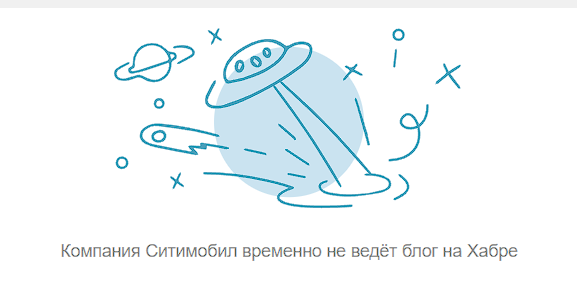

In [119]:
def get_habr_text(row : pd.DataFrame) -> pd.DataFrame:
  habr_text = pd.DataFrame()
  city_link = 'https://habr.com/ru/companies/citymobil'
  for link in row['link']:
      soup = BeautifulSoup(requests.get(link).text)
      time.sleep(0.3)
      try:
        title = soup.find('h1', class_= 'tm-title tm-title_h1').text.strip()
        text_ = soup.find('div', xmlns='http://www.w3.org/1999/xhtml').text.strip().replace('\n', '')
        date = soup.find('span', 'tm-article-datetime-published').text
        try:
          rating = soup.find('span', class_ = 'tm-votes-meter__value tm-votes-meter__value tm-votes-meter__value_positive tm-votes-meter__value_appearance-article tm-votes-meter__value_rating').getText()
        except:
          rating = 0
        row = {'date': date, 'title': title, 'text': text_, 'link' : link, 'rating': rating}
        habr_text = pd.concat([habr_text, pd.DataFrame([row])])
      except:
        if city_link in link:
          title = 'Citymobil Data Meetup'
          text = 'Компания Ситимобил временно не ведёт блог на Хабре, ссылка не действительна'
          row = {'date': date, 'title': title, 'text': text, 'link': link, 'rating': None}
          habr_text = pd.concat([habr_text, pd.DataFrame([row])])
        else:
          title = 'что-то пошло не так'
          text = 'что-то пошло не так'
          row = {'date': date, 'title': title, 'text': text, 'link': link, 'rating': None}
          habr_text = pd.concat([habr_text, pd.DataFrame([row])])
  habr_text.reset_index(drop=True, inplace=True)
  return habr_text

res_text = get_habr_text(habr_df)

In [120]:
res_text

,date,title,text,link,rating
0,14 сен в 14:36,Кто отвечает за развитие Python,"Начиная с первой версии Python, развитием язык...",https://habr.com/ru/companies/sberbank/article...,+18
1,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,Проверка типов и проверка значений обрабатываю...,https://habr.com/ru/articles/732388/,+15
2,10 сен в 14:30,Создание библиотеки Python: полный гайд,Привет друзья! Это моя первая статья на Хабр'е...,https://habr.com/ru/articles/760046/,+5
3,12 сен в 17:22,Моделирование биологических явлений с помощью ...,Автор статьи: Артем Михайлов\rМоделирование би...,https://habr.com/ru/companies/otus/articles/76...,+12
4,8 сен в 14:40,6 развлекательных проектов на Python: от шавер...,"Все, кто кодят на Python, знают, что это далек...",https://habr.com/ru/companies/selectel/article...,+33
5,16 сен в 17:55,Python в помощь инженеру ПТО,Всем привет. В статье приведу немного скриптов...,https://habr.com/ru/articles/761484/,+9
6,9 мар 2021 в 12:01,Маленькие Python для маленьких embedded-програ...,На Хабре уже немало писали про обучающий микро...,https://habr.com/ru/companies/ruvds/articles/5...,+36
7,22 авг в 20:14,Microsoft добавила Python в Excel,"22 августа 2023 года Microsoft сообщила, что д...",https://habr.com/ru/news/756266/,+22
8,14 сен в 13:16,Архитектура высоконагруженных телеграм-ботов н...,Приветствую всех читателей Otus! Телеграм-боты...,https://habr.com/ru/companies/otus/articles/76...,+16
9,23 мар в 16:18,Решаем задачу по взаимодействию микросервисов ...,Когда речь заходит про взаимодействие микросер...,https://habr.com/ru/companies/selectel/article...,+51


Now it remains to merge all received data into one dataframe.

In [121]:
def get_habr_posts(query : list, pages : int) -> pd.DataFrame:
  res = habr_posts(query, pages)
  res_text = get_habr_text(res)
  result = res.merge(res_text, how = 'outer', on = ['date', 'title','link'])
  return result


In [122]:
result = get_habr_posts(['Python', 'Data Science', 'ML'], 2)
result

,date,title,link,text,rating
0,14 сен в 14:36,Кто отвечает за развитие Python,https://habr.com/ru/companies/sberbank/article...,"Начиная с первой версии Python, развитием язык...",+18
1,6 сен в 14:31,Обзор книги Claudio Jolowicz — Hypermodern Pyt...,https://habr.com/ru/companies/usetech/articles...,Даниил НикитинСтарший разработчик ГК ЮзтехКолл...,+2
2,22 авг в 20:14,Microsoft добавила Python в Excel,https://habr.com/ru/news/756266/,"22 августа 2023 года Microsoft сообщила, что д...",+22
3,3 сен в 14:00,Шаг в астрофизику с помощью Python,https://habr.com/ru/companies/otus/articles/75...,"Давным-давно, человечество поднимало взоры к н...",+17
4,29 апр в 10:09,7 и 1/2 подходов к проверке атрибутов классов ...,https://habr.com/ru/articles/732388/,Проверка типов и проверка значений обрабатываю...,+15
...,...,...,...,...,...
59,13 мая 2019 в 10:00,Announcing ML.NET 1.0,https://habr.com/ru/companies/microsoft/articl...,We are excited to announce the release of ML.N...,+11
60,26 мая 2020 в 12:14,Citymobil Data Meetup,https://habr.com/ru/companies/citymobil/news/5...,Компания Ситимобил временно не ведёт блог на Х...,None
61,25 фев 2020 в 14:30,Citymobil Data Meetup,https://habr.com/ru/companies/citymobil/news/5...,Компания Ситимобил временно не ведёт блог на Х...,None
62,25 фев 2020 в 14:30,Citymobil Data Meetup,https://habr.com/ru/companies/citymobil/news/5...,Компания Ситимобил временно не ведёт блог на Х...,None


Mission complete. We found all pages according to the given list, displayed the publication date, title, link to the article, article text and its rating.